<a href="https://colab.research.google.com/github/pipaber/UTEC_2025_IA_FUNDAMENTALS/blob/main/TAREA/TAREA_2/Flow_Shop_Hill_Climbing_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Variables iniciales
#num_jobs = 2 # @param {type:"number"}
#num_machines = 10 # @param {type:"number"}

num_jobs = 10
num_machines = 10

def generar_matriz_aleatoria(
    num_filas, num_columnas,
    tiempo_prom=2, tiempo_desviacion=2,
    minimo= 2.0, maximo=15.0
):
    """
    Genera una matriz de tiempos de procesamiento aleatoria.

    Parámetros:
    - num_filas: número de trabajos (filas).
    - num_columnas: número de máquinas (columnas).
    - tiempo_prom: tiempo promedio de procesamiento
    - tiempo_desviacion: sd de tiempo de procesamiento

    Retorna:
    - Matriz de tiempos de procesamiento aleatoria.
    """
    #matriz_tiempos = np.random.randint(tiempo_prom, tiempo_desviacion + 1, size=(num_filas, num_columnas))
    matriz_tiempos = np.random.gamma(tiempo_prom, tiempo_desviacion, size=(num_filas, num_columnas))
    np.clip(matriz_tiempos, minimo, maximo, out=matriz_tiempos)
    return matriz_tiempos

tiempos_procesamiento = generar_matriz_aleatoria(num_jobs, num_machines)
print("Trabajos vs Maquinas = Tiempos")
print(tiempos_procesamiento)

# Step 1
current_solution = np.arange(len(tiempos_procesamiento))
np.random.shuffle(current_solution)
print("\nSolución Inicial")
print(current_solution)

# Paso 2
def times_for_fitness(sol):

  # La primera fila nos da la cantidad de maquinas
  num_maquinas = tiempos_procesamiento.shape[1]

  # Número de trabajos
  num_trabajos = tiempos_procesamiento.shape[0]

  # Matríz para almancenar los tiempos de cada ejecución
  matriz_tiempos = np.zeros((num_trabajos, num_maquinas), dtype=np.float32)

  for i, trabajo in enumerate(sol):
      for j in range(num_maquinas):
          if i == 0 and j == 0:
              matriz_tiempos[i][j] = tiempos_procesamiento[trabajo][j]
          elif i == 0:
              matriz_tiempos[i][j] = matriz_tiempos[i][j-1] + tiempos_procesamiento[trabajo][j]
          elif j == 0:
              matriz_tiempos[i][j] = matriz_tiempos[i-1][j] + tiempos_procesamiento[trabajo][j]
          else:
              matriz_tiempos[i][j] = max(matriz_tiempos[i-1][j], matriz_tiempos[i][j-1]) + tiempos_procesamiento[trabajo][j]
  return matriz_tiempos

def fitness(sol):
  tiempo_total_finalizacion = times_for_fitness(sol)[-1][-1]
  return tiempo_total_finalizacion

current_fitness = fitness(current_solution)
print("Fitness Inicial")
print( current_fitness )



Trabajos vs Maquinas = Tiempos
[[ 2.          3.94546268  5.48041985  3.62122423  8.93177007  5.00562188
   5.20159074  2.         11.36253657  2.        ]
 [ 3.31507563  7.16415658  6.63818068  7.65529416  2.04592113  9.57143977
   3.13355163  2.71699406  2.          2.        ]
 [ 2.87593901  7.86330465  7.6230528   4.87867157  7.54008161  2.87263688
   2.          5.03847555  2.          2.        ]
 [12.26936764  2.          2.          3.96816743  9.11971168  4.0579553
   2.94101842  6.46677005  3.66248789  2.46325841]
 [ 2.          3.61661745  9.59671355  6.67071029  3.12732271  5.28027019
   2.          4.65959788 10.29494196  5.32419381]
 [ 2.          2.          2.          2.          2.33135397  5.73306482
   2.          2.42728615  4.00863289  4.66888525]
 [ 9.39051584  2.          2.          2.70950657  6.44486262  5.31358189
  12.3639512   3.50056832  3.33195858  2.71991829]
 [ 5.05449385  2.36390179  3.95573328  9.39308938  2.73460883  2.29164669
   2.          5.1814


Iteration...


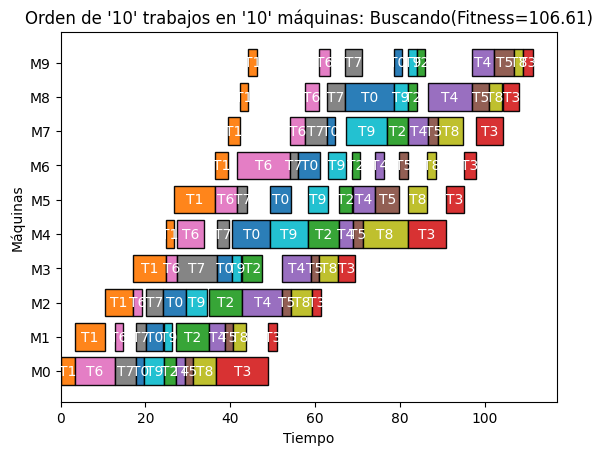

Current solution: [1 6 7 0 9 2 4 5 8 3] - Assosiated fitness: 106.60693359375

Iteration...


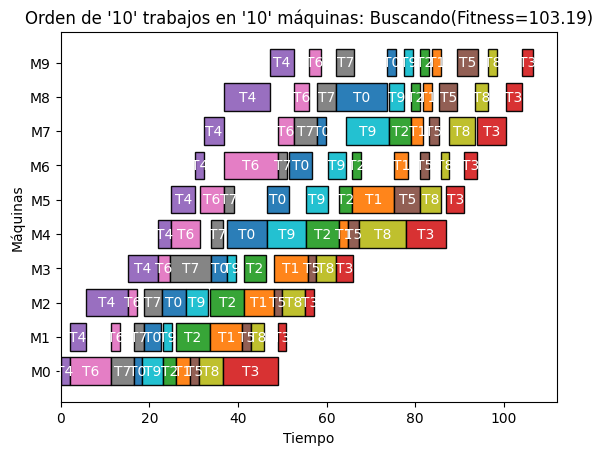

Current solution: [4 6 7 0 9 2 1 5 8 3] - Assosiated fitness: 103.18990325927734

Iteration...


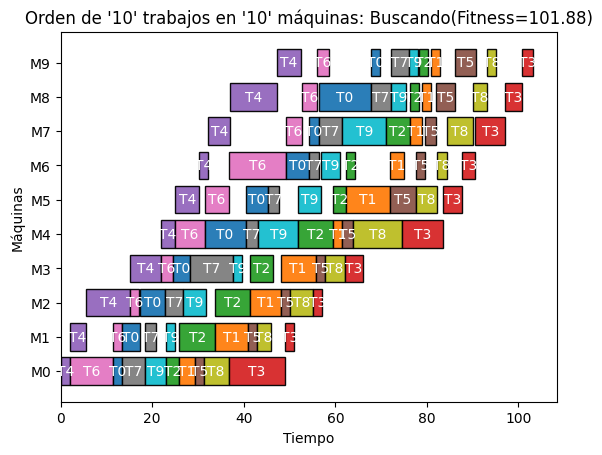

Current solution: [4 6 0 7 9 2 1 5 8 3] - Assosiated fitness: 101.87947082519531

Iteration...


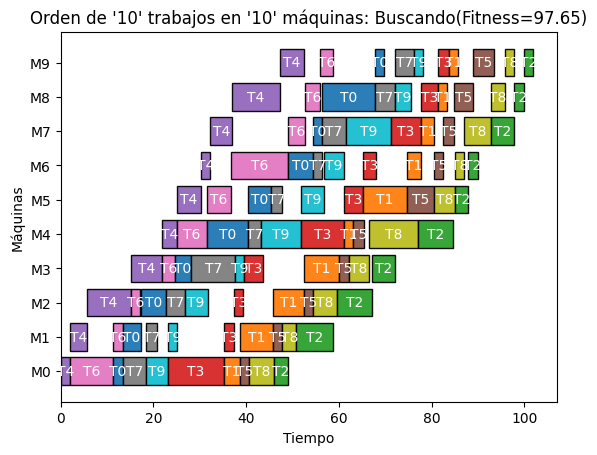

Current solution: [4 6 0 7 9 3 1 5 8 2] - Assosiated fitness: 97.650146484375

Iteration...


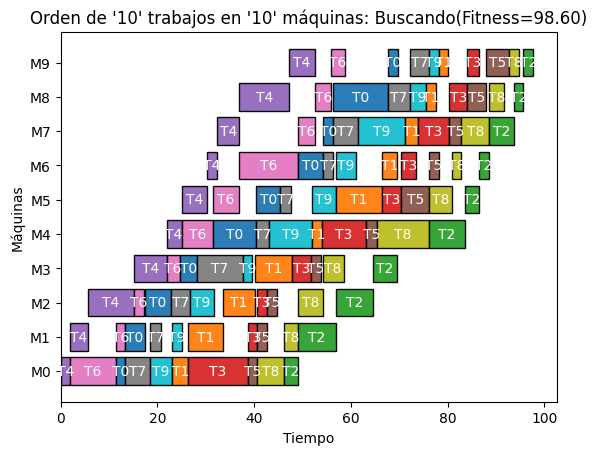

Current solution: [4 6 0 7 9 1 3 5 8 2] - Assosiated fitness: 98.60354614257812


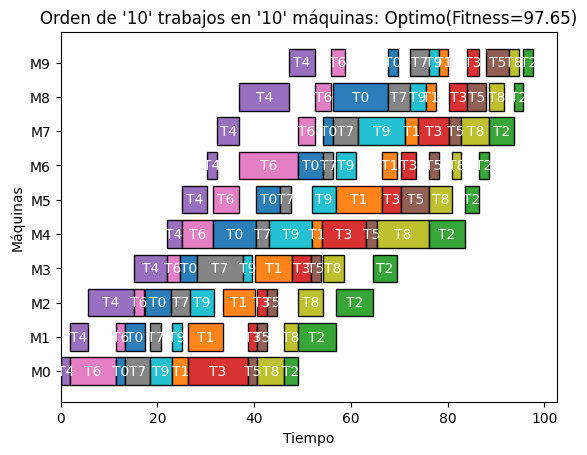

In [30]:
# Paso 3
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

# Paso 5
# Función para graficar el orden de tareas en las máquinas
def plot_schedule(sol, fitness, tipo):
    matriz_tiempos = times_for_fitness(sol)
    num_maquinas = tiempos_procesamiento.shape[1]
    num_trabajos = tiempos_procesamiento.shape[0]

    fig, ax = plt.subplots()

    for i, trabajo in enumerate(sol):
        for j in range(num_maquinas):
            inicio = matriz_tiempos[i][j] - tiempos_procesamiento[trabajo][j]
            duracion = tiempos_procesamiento[trabajo][j]
            ax.barh(j, duracion, left=inicio, color=f"C{trabajo}", edgecolor="black",alpha=0.95)
            ax.text(inicio + duracion / 2, j, f"T{trabajo}", va="center", ha="center", color="white")

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Máquinas")
    ax.set_title(f"Orden de '{num_trabajos}' trabajos en '{num_maquinas}' máquinas: {tipo}(Fitness={fitness:.2f})")
    ax.set_yticks(range(num_maquinas))
    ax.set_yticklabels([f"M{j}" for j in range(num_maquinas)])

    plt.show()

# Paso 4
def hill_climbing(current_solution):
  print("")
  count = 0

  best_fitness = None

  while True:

    print("Iteration...")

    # step: generar vecinos
    neighbors = get_neighbors(current_solution)

    # obtener al vecino con el mejor fitness (min)
    best_neighbor = min(neighbors, key=fitness)

    # guardar el fitness del vecino con mejor fitness
    best_neighbor_fitness = fitness(best_neighbor)

    if count % 2 == 0:
      plot_schedule(current_solution, best_neighbor_fitness, "Buscando")

    print(f"Current solution: {current_solution} - Assosiated fitness: {best_neighbor_fitness}")

    if best_neighbor_fitness < fitness(current_solution):
      current_solution = best_neighbor
      best_fitness = best_neighbor_fitness
    else:
      return current_solution, best_fitness

    print("")

solution, solution_fitness = hill_climbing(current_solution)


#plot_schedule(current_solution, current_fitness, "Inicial")
plot_schedule(solution, fitness(solution), "Optimo")